In [ ]:
! pip install yellowbrick

In [13]:
! pip install seaborn

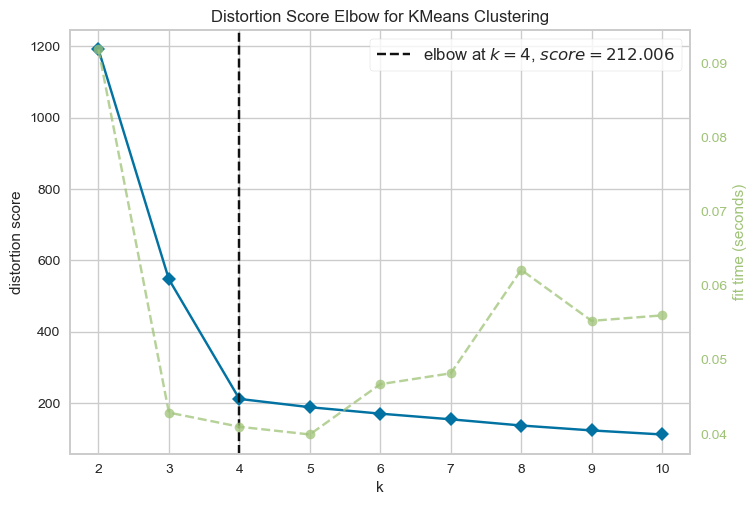

Best K Accuarcy: 1.0


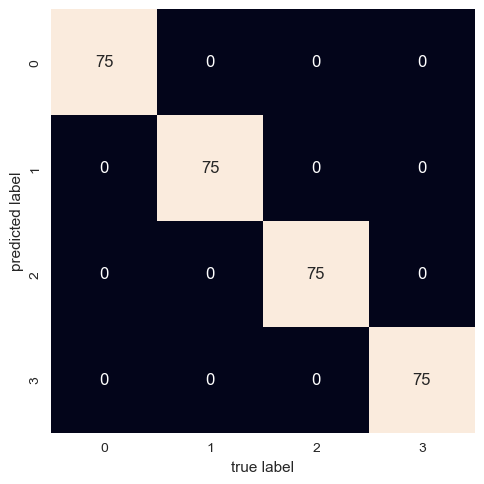

In [17]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data with true cluster labels
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Create the KMeans model
model = KMeans(n_init=10, random_state=0)

# Use the KElbowVisualizer to determine the optimal K
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(X)

# Visualize the elbow plot
visualizer.show()

optimal_k = visualizer.elbow_value_ 

# Fit K-Means model with the manually selected optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X)
kmeans.cluster_centers_.shape

#        create a zero matrix with the same shape
labels = np.zeros_like(clusters)
for i in range(optimal_k):
    # this is similar to another for loop to check every element of clusters
    # group all the elements of clusters == i, then assign these elements to mask
    mask = (clusters == i)
    labels[mask] = mode(y_true[mask])[0]
    
accuarcy = accuracy_score(y_true, labels)

print(f'Best K Accuarcy: {accuarcy}')

# Calculate and visualize the confusion matrix
confusion_mat = confusion_matrix(y_true, labels)

# Print or visualize the confusion matrix as needed
mat = confusion_matrix(y_true, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');